Euler 78 Viz

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [100]:
memo = [[0]*26 for i in range(26)]
memo[1][1] = 1
memo[2][1] = 1
memo[2][2] = 2
memo[3][1] = 1
memo[3][2] = 2
memo[3][3] = 3

In [101]:
x = 4

while x+1 <= len(memo):
    for i in range(1,x+1):
        if i == 1:
            memo[x][i] = 1
        elif i == x or i == (x-1):
            memo[x][i] = memo[x][i-1] + 1
        else:
            mini = min(x-i,i)
            memo[x][i] = memo[x][i-1] + memo[x-i][mini]
    x += 1

partition_numbers = []
for i in range(1, len(memo)):
    partition_numbers.append([i, memo[i][i]])
print(partition_numbers)

[[1, 1], [2, 2], [3, 3], [4, 5], [5, 7], [6, 11], [7, 15], [8, 22], [9, 30], [10, 42], [11, 56], [12, 77], [13, 101], [14, 135], [15, 176], [16, 231], [17, 297], [18, 385], [19, 490], [20, 627], [21, 792], [22, 1002], [23, 1255], [24, 1575], [25, 1958]]


In [102]:
df_numbers = pd.DataFrame(partition_numbers, columns = ['input', 'output'])
df_numbers.head()

,input,output
0,1,1
1,2,2
2,3,3
3,4,5
4,5,7


In [103]:
memo2 = [[0]*26 for i in range(26)]
for i in range(1, len(memo2)):
    for j in range(1, i+1):
        memo2[i][j] = memo[i][j]-memo[i][j-1]
# for i in range(len(memo2)):
#     print(i, memo2[i])

increments = []
for i in range(len(memo2)):
    for j in range(len(memo2[i])):
        if memo2[i][j] != 0:
            increments.append([i, j, memo2[i][j]])
#print(increments)


Make dataframes to organize my numbers

In [104]:
df_intervals = pd.DataFrame(increments, columns = ['number', 'subpartition', 'increment'])
df_intervals.head()

,number,subpartition,increment
0,1,1,1
1,2,1,1
2,2,2,1
3,3,1,1
4,3,2,1


In [105]:
df_merged = df_intervals.merge(df_numbers, left_on = 'number', right_on = 'input', how = 'left')
df_merged = df_merged[['number', 'subpartition', 'increment', 'output']]
df_merged.head()

,number,subpartition,increment,output
0,1,1,1,1
1,2,1,1,2
2,2,2,1,2
3,3,1,1,3
4,3,2,1,3


Look at growth of the first 25 partition numbers

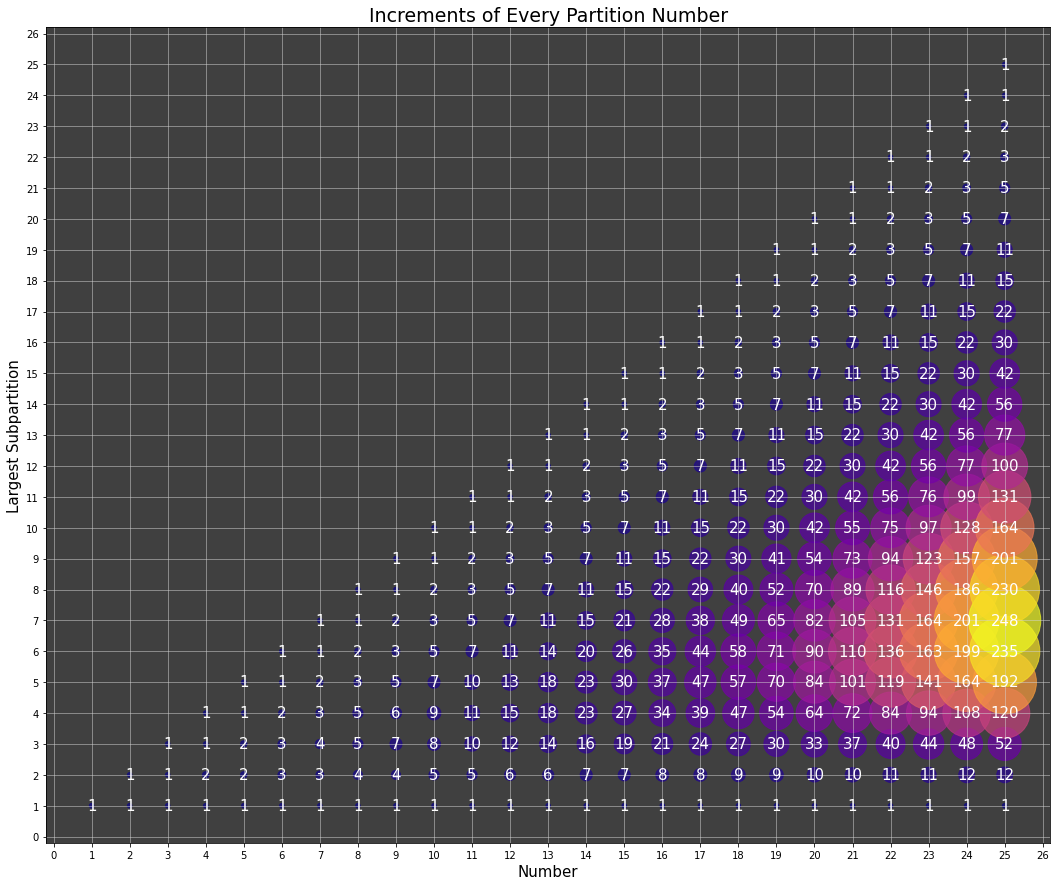

In [106]:
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot()
ax.set_facecolor('#404040')
ax.scatter(df_merged["number"], df_merged["subpartition"], c = df_merged["increment"], s = df_merged["increment"]*21, alpha = 0.7, cmap='plasma')
for i in range(len(df_merged)):
    plt.text(df_merged["number"][i], df_merged["subpartition"][i], df_merged["increment"][i], ha = 'center', va = 'center', size = 15, color = 'white')
plt.title("Increments of Every Partition Number", fontsize = 19)

plt.xlabel("Number", fontsize = 15)
ax.xaxis.set_major_locator(MultipleLocator(1.0))
ax.grid(which = 'major', axis = 'x', linewidth = 1, color = 'lightgray', alpha = 0.5)

plt.ylabel("Largest Subpartition", fontsize = 15)
ax.yaxis.set_major_locator(MultipleLocator(1.0))
ax.grid(which = 'major', axis = 'y', linewidth = 1, color = 'lightgray', alpha = 0.5)

In [110]:
df_partition = df_merged[(df_merged['number'] == df_merged['subpartition'])][['number', 'output']]

df_partition.head()

,number,output
0,1,1
2,2,2
5,3,3
9,4,5
14,5,7


Previous code
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot()
ax.bar(df_partition['number'], df_partition['output'], color = 'mediumseagreen')
ax.bar_label(ax.containers[0])
plt.title("Partition Numbers", fontsize = 19)
plt.xlabel("Partition Number", fontsize = 15)
plt.ylabel("Number of Partitions", fontsize = 15)
ax.xaxis.set_major_locator(MultipleLocator(1.0))

([<matplotlib.axis.XTick at 0x7fc07d2c2b20>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

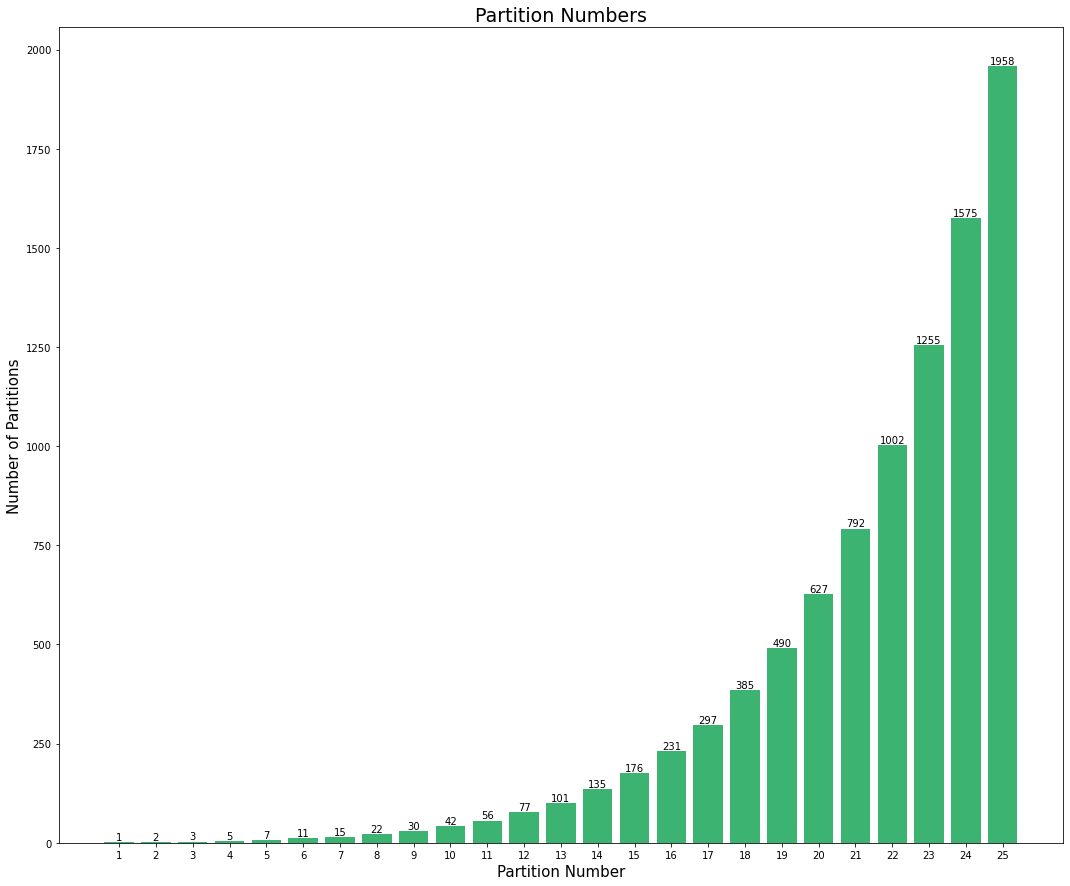

In [117]:
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot()
ax.bar(df_partition['number'], df_partition['output'], color = 'mediumseagreen')
ax.bar_label(ax.containers[0])
plt.title("Partition Numbers", fontsize = 19)
plt.xlabel("Partition Number", fontsize = 15)
plt.ylabel("Number of Partitions", fontsize = 15)
plt.xticks(np.arange(1, 26, step = 1))